### 데이터셋 기반 지식

- 제조 공정 특징 선택 및 분류
    
    ![Untitled](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/bbd0bc4a-4d2e-4c91-a793-5fb519fc1e48/Untitled.png)
    
- 예지 정비에 초점을 맞춘 예제로
    - 예지정비란 설비가 완전히 고장나기 전에 비정상 시그널이나 불량 조건 등을 파악하고 해결하며 설비가 전체 중단되는 Downtime을 예방하고자 하는 분석과정
    - 이때 불량을 찾아내는것은 고난도 작업이며 300mm 웨이퍼에서 설비 문제로 발생하는 아주 작은 불량을 찾아내는 것은 우리나라 면적애서 100원짜리 동전 한개를 찾는것과 같음
    
    💡 **웨이퍼 wafer**
    
    - 반도체의 기반으로, 많은 소리를 하나의 칩 안에 직접한 전자부붐인 적접회로가 웨이퍼라는 얇은 기판 위에 다수의 동일 회로를 만들어 반도체 직접회로 탄생됨)
    - 기술이 더 발전하면서 회로의 선폭은 더 얇아저 이에 불량을 감지하는 것이 더욱 어려워 짐
        
        ![Untitled](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/50e53ddd-e5db-4af1-8df3-1935f201eccf/Untitled.png)
        
    
    - 메모리 반도체는 보통 500여개의 공전, 1000여개의 계측 단계를 거쳐 생산되는데 이 과정에서 설비에 문제가 생길 경우 웨이퍼의 전량을 폐기해야하는 손실이 있음
    - 이와 같은 문제를 방지하기 위해, 반도체 설비 내 공정 센서에서 발생하는 데이터들을 수집하고 분석
- 이에 따라 반도체 공정에서 발생하는 센서 데이터을 기반으로 공정의 수율 합/불를 판별하는 프로세스

### 데이터셋 양상

[UCI SECOM Dataset](https://www.kaggle.com/datasets/paresh2047/uci-semcom)

- UCI 저장소에 있는 반도체 생산 공정 데이터( Data from a semi-conductor manufacturing process)
- 노이즈가 포함된 많은 변수를 가지고 있고, 결측 데이터(NA)를 포함
- Data from a semi-conductor manufacturing process 
반도체 공정중 발생한 데이터셋

![Untitled](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/1de559c5-01b0-4797-b430-ff5f20421b66/Untitled.png)

- 반도체 공정 내 datetime 별로 590개 센서 데이터
- 수집 기간 2008년 7월 19일부터 2008년 10월 17일

## 라이브러리 임포트(lib import)

In [296]:
# 전처리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 모델 생성 및 훈련
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, svm
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import Lasso
from sklearn.svm import OneClassSVM
from sklearn.metrics import confusion_matrix , plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import xgboost as xgb

# 모델 평가 import
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report, accuracy_score, matthews_corrcoef

## 데이터 분석(data mining) 및 전처리(Data Preprocessor)


In [297]:
# 데이터 업로드 및 정보확인
df = pd.read_csv("uci-secom.csv", parse_dates=["Time"])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: datetime64[ns](1), float64(590), int64(1)
memory usage: 7.1 MB
None


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


### 시각화

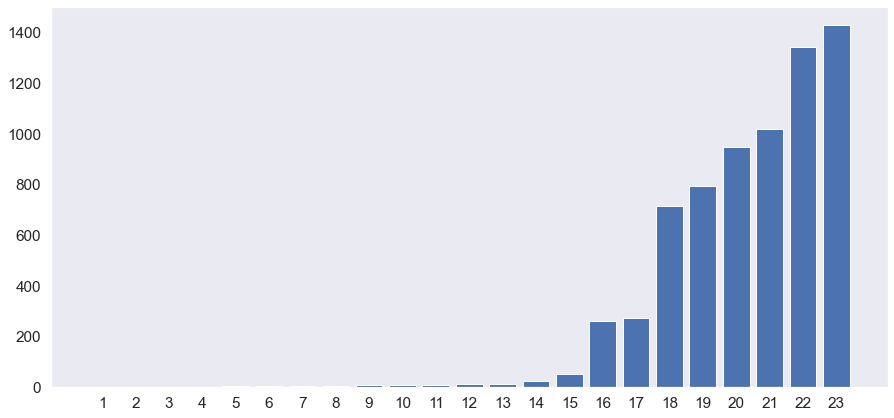

In [298]:
# 가장 많은 센서 데이터 결측치 확인
missing=df.isna().sum()

# 결측치 시각화
fig = plt.subplots(figsize=(15,7))
plt.bar(np.arange(1, missing.sort_values(ascending=True).nunique()+1,1), missing.sort_values(ascending=True).unique())
plt.xticks(np.arange(1, missing.sort_values(ascending=True).nunique()+1,1));

In [299]:
# 평균으로 결측치처리 - 0으로 채우기
# 결측치는 신호가 없는걸로 간주하여 0으로 채우는것으로 하여 신호가 없는것으로 가정
df = df.replace(np.NaN, 0)

# 결측치 확인 - any()는 하나라도 true면 true 반환
# df.isnull().any() - 결럼별 boolean 값 반환
df.isnull().any().any()

False

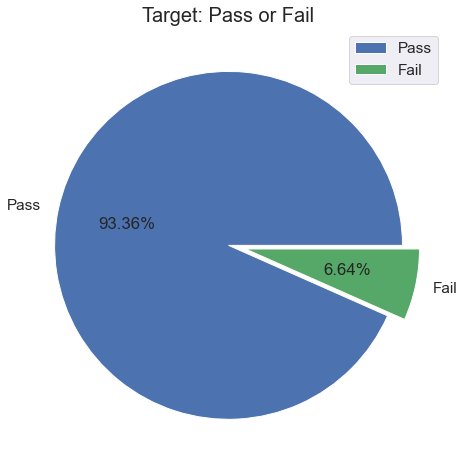

In [300]:
# 파이 그래프
# 불량 분포 보기
labels = ['Pass', 'Fail']
size = df['Pass/Fail'].value_counts()
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, explode = explode, autopct = "%.2f%%")
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64


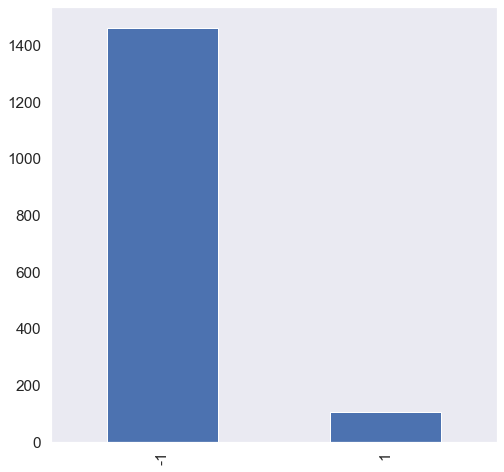

In [301]:
# var 차트 1/ -1
df['Pass/Fail'].value_counts().plot(kind="bar");
print(df['Pass/Fail'].value_counts())

### 상관관계 분석

In [302]:
corr_matrix = df.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.047782,0.007590,0.009448,-0.000915,0.008706,0.006129,0.010738,-0.050979,0.009959,...,-0.033622,0.010503,0.019840,0.017889,0.019522,0.044745,0.005233,0.003918,0.021489,0.006149
1,-0.047782,1.000000,-0.030448,0.006021,0.002192,-0.030127,-0.031616,-0.025086,0.027609,0.003704,...,0.043107,-0.017392,0.003809,0.004409,0.003821,-0.009219,0.039479,0.040500,0.044464,-0.019672
2,0.007590,-0.030448,1.000000,0.323782,0.020438,0.990089,0.818770,0.747230,0.002600,-0.045731,...,0.038416,-0.010627,-0.004771,-0.003030,-0.004263,0.015733,-0.007090,-0.009122,-0.030434,0.024929
3,0.009448,0.006021,0.323782,1.000000,-0.054015,0.286397,-0.119180,0.279646,-0.108217,0.051567,...,0.000922,0.009788,0.022593,0.022361,0.023288,0.038755,-0.038371,-0.033648,-0.084449,-0.016341
4,-0.000915,0.002192,0.020438,-0.054015,1.000000,0.007041,-0.034736,-0.475861,-0.020082,0.053859,...,0.107783,0.012778,-0.001323,-0.001605,-0.001636,-0.043693,-0.030930,-0.026046,0.050741,-0.013577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.044745,-0.009219,0.015733,0.038755,-0.043693,0.019435,-0.005877,0.051943,0.017642,0.032423,...,-0.206109,-0.008240,0.002391,0.001602,0.002872,1.000000,0.169634,0.165942,-0.484741,0.004448
587,0.005233,0.039479,-0.007090,-0.038371,-0.030930,-0.003077,0.016362,-0.006335,0.027655,0.057856,...,0.227096,0.018981,-0.001809,-0.001696,-0.002122,0.169634,1.000000,0.974332,0.391503,0.035670
588,0.003918,0.040500,-0.009122,-0.033648,-0.026046,-0.004919,0.013832,-0.014288,0.033729,0.059321,...,0.216292,0.019083,-0.001445,-0.001182,-0.001746,0.165942,0.974332,1.000000,0.389898,0.031447
589,0.021489,0.044464,-0.030434,-0.084449,0.050741,-0.026117,0.002246,-0.067263,-0.016895,0.004106,...,0.431632,0.028502,-0.002453,-0.002750,-0.003266,-0.484741,0.391503,0.389898,1.000000,-0.002472


c:\Users\sumin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: vmin. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


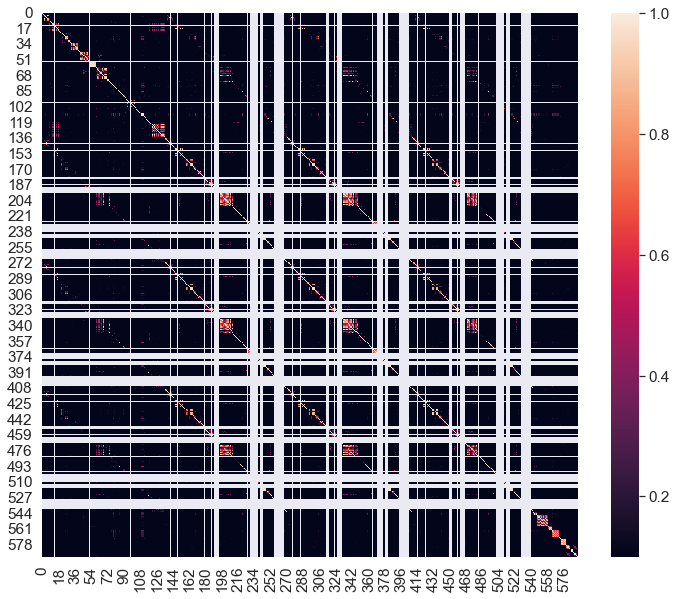

In [303]:
# 시각화
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,0.1)
plt.show()

<Figure size 1440x1440 with 0 Axes>

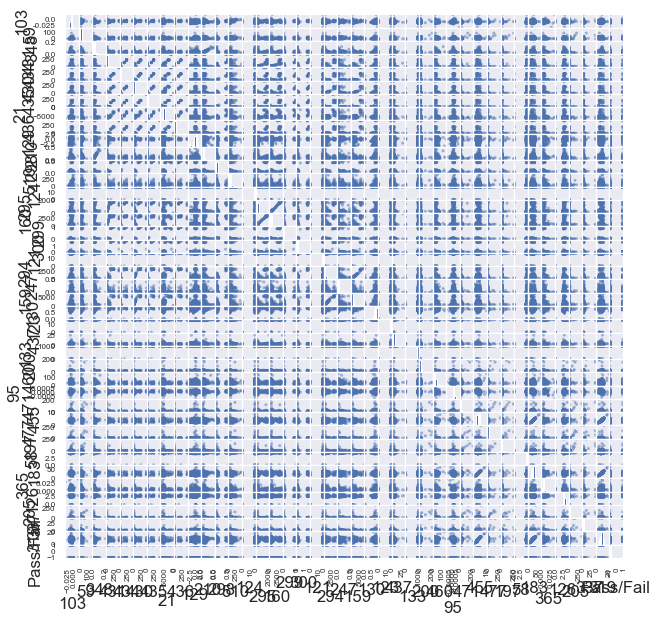

In [304]:
# 관계 있는 컬럼 산포 그래프로 표현
df2 = pd.DataFrame(df)[['103','59','348','431','434','430','435','21','436','129','210','298','510','124','295','160',
'299','300','121','294','247','159','130','123','437','133','200','460','95','471','455','477','197','58','183','365',
'126','205','337','319','Pass/Fail']]

plt.figure(figsize=(20,20))
pd.plotting.scatter_matrix(df2, alpha=0.5, figsize=(10,10))
plt.show()

### 데이터 전처리

In [305]:
df.head(1)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.0,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,0.0,0.5005,0.0118,0.0035,2.363,0.0,0.0,0.0,0.0,-1


In [306]:
#Remove the highly collinear features from data
# 상관관계에서 동일 선상에 있는 피처 제거
def remove_collinear_features(x, threshold):
  '''
  상관계수가 있는 데이터 프레임에서 선형 피처를 제거하여 모델 개선
  Objective:
    Remove collinear features in a dataframe with a correlation coefficient
    greater than the threshold. Removing collinear features can help a model 
    to generalize and improves the interpretability of the model.

  Inputs: 
    x: features dataframe
    threshold: features with correlations greater than this value are removed

  Output: 
    dataframe that contains only the non-highly-collinear features
  '''

  # 상관행렬 계산
  corr_matrix = x.corr()
  iters = range(len(corr_matrix.columns) - 1)
  drop_cols = [] # drop 리스트

  # 행렬을 반복해서 상관관계 비교
  for i in iters:
    for j in range(i+1):
      item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
      col = item.columns
      row = item.index
      val = abs(item.values)

      # 상관관계 값이 임계값을 초과하는 경우 drop할 컬럼 list 추가
      if val >= threshold:
        drop_cols.append(col.values[0])

  # 컬럼 제거
  drops = set(drop_cols)
  x = x.drop(columns=drops)

  return x

# 피처 대입
# 상관관계가 70% 이상인 열 제거
# 양과 음관계 모두 고려
df = remove_collinear_features(df,0.70)

In [307]:
df.head(1)

,Time,0,1,2,3,4,8,9,10,11,...,570,571,572,578,582,583,586,587,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.0,2187.7333,1411.1265,1.3602,1.5005,0.0162,-0.0034,0.9455,...,533.85,2.1113,8.95,0.0,0.5005,0.0118,0.0,0.0,0.0,-1


In [308]:
# 타입 df 제거
df = df.drop(columns=['Time'], axis=1)
df.shape

(1567, 307)

In [309]:
df.head(1)

,0,1,2,3,4,8,9,10,11,13,...,570,571,572,578,582,583,586,587,589,Pass/Fail
0,3030.93,2564.0,2187.7333,1411.1265,1.3602,1.5005,0.0162,-0.0034,0.9455,0.0,...,533.85,2.1113,8.95,0.0,0.5005,0.0118,0.0,0.0,0.0,-1


In [310]:
# x, y 데이터 지정 및 train, test 데이터 나누기
x = df.iloc[:,:306] # Pass/Fail 제외
y = df["Pass/Fail"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
print("test, train 데이터 확인")
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

test, train 데이터 확인
shape of x_train:  (1096, 306)
shape of x_test:  (471, 306)
shape of y_train:  (1096,)
shape of y_test:  (471,)


In [311]:
# 정규화  standardization
sc = StandardScaler()

# x 피처 스케일러
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 모델 생성 및 예측

### KNN

In [312]:
# KNN 분류 모델
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
ypred_knn = knn.predict(x_test)
print('Accuracy KNeighborsClassifier = ',metrics.accuracy_score(y_test,ypred_knn))

Accuracy KNeighborsClassifier =  0.8980891719745223


<AxesSubplot:>

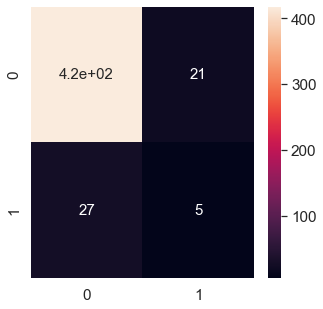

In [313]:
cm = confusion_matrix(y_test, ypred_knn)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

### Logistic

In [314]:
# 로지스틱 분류 모델
lr = LogisticRegression(C=1e20)
lr.fit(x_train,y_train)
ypred_lr = lr.predict(x_test)
print('Accuracy LogisticRegression = ',metrics.accuracy_score(y_test,ypred_lr))

Accuracy LogisticRegression =  0.8492569002123143


<AxesSubplot:>

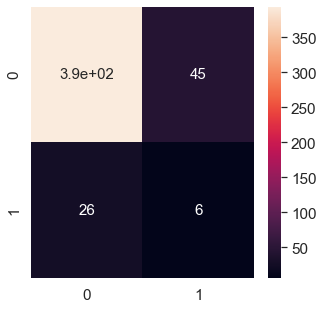

In [315]:
cm = confusion_matrix(y_test, ypred_lr)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

### XGBoost

In [316]:
# xgboost는 1.3.3, 1.4.0 등버전이 있는데 github에서 제공하는 버전은 1.5이며 1.5 이하 버전에서는 각종 경고메시지 나옴
# warnings.warn(label_encoder_deprecation_msg, UserWarning) - use_label_encoder=False 옵션 설정
# 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior - eval_metric='logloss' 옵션 설정
xgb = XGBClassifier(n_estimators=20, random_state=1, eval_metric='logloss')
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
print('Accuracy XGBClassifier = ',metrics.accuracy_score(y_test,y_pred_xgb))
print('Accuracy XGBClassifier = ', xgb.score(x_test,y_test))

c:\Users\sumin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy XGBClassifier =  0.9320594479830149
Accuracy XGBClassifier =  0.9320594479830149


<AxesSubplot:>

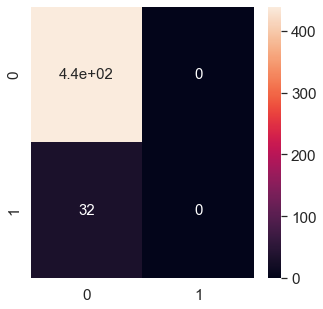

In [317]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

### RandomForestClassifier

In [318]:
rf = RandomForestClassifier(n_estimators=100, random_state=1,verbose=0 )
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print('Accuracy RandomForestClassifier = ', rf.score(x_test,y_test))

Accuracy RandomForestClassifier =  0.9320594479830149


<AxesSubplot:>

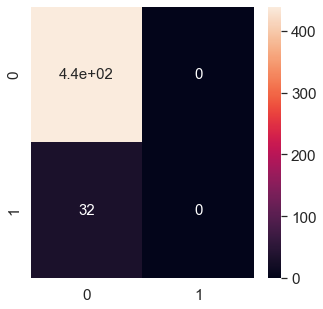

In [319]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

### Lasso

In [320]:
lasso = Lasso(alpha=0.1,random_state=1)
lasso.fit(x_train,y_train)
y_pred_lasso = lasso.predict(x_test)

# 예측값 부호를 분류기로 변환
y_pred_lasso = np.sign(y_pred_lasso)
print("Accuracy: ", lasso.score(x_test,y_test))

Accuracy:  -7.974076019068299e-05


<AxesSubplot:>

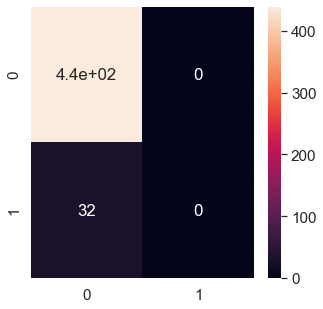

In [321]:
cm = confusion_matrix(y_test, y_pred_lasso)
sns.heatmap(cm, annot = True)

## UnderSampling of the Dataset
- 데이터가 불균형한 분포를 가지는 경우, 모델 학습의이 제대로 이루어지지 않을 확률이 높음
- 이러한 문제를 해결하기 위해 언더 샘플링, 오버 샘플링
- 과소표집(UnderSampling)
  - 언더 샘플링은 불균형한 데이터 셋에서 높은 비율을 차지하던 클래스의 데이터 수를 줄임으로써 데이터 불균형 해소
  - 하지만 학습에 사용되는 전체 데이터 수를 급격히 감소시켜 성능이 떨어질 수 있음
- 과대표집(OverSampling)
  - 낮은 비율 클래스의 데이터 수를 늘림으로써 데이터 불균형 해소
  - 이 방법이 가능하다면 언더 샘플링보다 훨씬 좋은 해결책이 될 수 있으나 어떻게 생성하냐는 게 중요함
  - SMOTE(Synthetic Minority Over-sampling Technique)으로 낮은 비율 클래스 데이터들의 최근접 이웃을 이용하여 새로운 데이터를 생성

In [322]:
# 불합 개수 확인
# 104개
failed_tests = np.array(df[df['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

# 합격 개수 확인
# 1463개
normal_indices = df[df['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_failed_tests)
print(no_normal_indices)

104
1463


In [323]:
# Pass 클래스에서 104 랜덤 피처 선택
random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

# 합/불합에서 5.5 피처 선택
under_sample = np.concatenate([failed_tests, random_normal_indices])

# 언더 샘플 생성
undersample_data = df.iloc[under_sample, :]
undersample_data

,0,1,2,3,4,8,9,10,11,13,...,570,571,572,578,582,583,586,587,589,Pass/Fail
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,1.4436,0.0041,0.0013,0.9615,0.0,...,535.0245,2.0293,11.2100,0.0584,0.4958,0.0157,0.0584,0.0484,82.8602,1
10,2994.05,2548.21,2195.1222,1046.1468,1.3204,1.5144,-0.0190,0.0013,0.9433,0.0,...,532.1764,1.8715,9.5699,0.0355,0.4925,0.0158,0.0355,0.0205,57.8122,1
11,2928.84,2479.40,2196.2111,1605.7578,0.9959,1.4690,0.0170,-0.0154,0.9445,0.0,...,533.7464,2.1865,7.7400,0.0370,0.4987,0.0427,0.0370,0.0279,75.5077,1
14,2963.97,2629.48,2224.6222,947.7739,1.2924,1.4474,0.0144,-0.0119,0.9582,0.0,...,532.6446,2.2808,11.4200,0.0202,0.5077,0.0094,0.0202,0.0289,142.9080,1
23,2884.74,2514.54,2160.3667,899.9488,1.4022,1.5585,-0.0317,-0.0138,0.9638,0.0,...,536.0054,1.9902,8.7600,0.0098,0.4982,0.0099,0.0098,0.0213,216.8869,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,3046.33,2545.34,2172.3666,1752.3206,1.3622,1.5409,-0.0097,0.0043,0.9612,0.0,...,510.9145,1.7483,439.0500,0.0000,0.5031,0.0146,0.0277,0.0318,114.7497,-1
1210,3021.25,2473.65,2221.3667,2490.6947,1.2667,1.3728,0.0162,0.0033,0.9721,0.0,...,529.9445,1.9740,7.9100,0.0000,0.4999,0.0135,0.0264,0.0128,48.4774,-1
277,3054.18,2408.46,2178.7333,1039.3641,0.7367,1.4500,-0.0089,0.0004,0.9727,0.0,...,531.8655,2.3718,9.7900,0.0177,0.5036,0.0153,0.0177,0.0184,104.4612,1
1119,3059.62,2376.27,2266.8333,2040.1937,1.6558,1.4303,0.0048,-0.0040,0.9674,0.0,...,530.2409,1.9614,11.5400,0.0000,0.5024,0.0105,0.0154,0.0123,79.9402,-1


In [324]:
# 데이터 전처리 및 스플릿
x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail'] 
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x, y, test_size = 0.3, random_state = 1)

sc = StandardScaler()
x_train_us = sc.fit_transform(x_train_us)
x_test_us = sc.transform(x_test_us)

c:\Users\sumin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\sumin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sumin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy XGBClassifier =  0.5103448275862069


<AxesSubplot:>

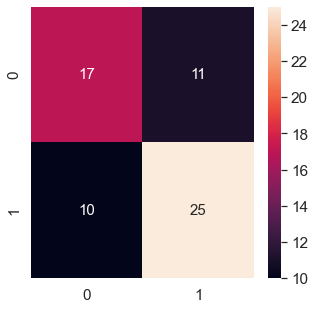

In [325]:
# XGBoost
xgb_us = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_us.fit(x_train_us, y_train_us)
y_pred_xgb_us = xgb_us.predict(x_test_us)
print('Accuracy XGBClassifier = ', xgb.score(x_train_us,y_train_us))

# confusion matrix
cm = confusion_matrix(y_test_us, y_pred_xgb_us)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})


In [326]:
# Grid Search - XGBoost (Undersampling)
parameters = [{
  'max_depth' : [1, 2, 3, 4, 5, 6],
  'cv' : [2,4,6,8,10], 
  'random_state' : [1]}]

grid_search = GridSearchCV(estimator = xgb_us, param_grid = parameters, scoring = 'accuracy',  n_jobs = -1)

grid_search = grid_search.fit(x_train_us, y_train_us)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

c:\Users\sumin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\sumin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sumin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23:12:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "cv" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Best Accuracy:  0.6413793103448275
Best Parameter:  {'cv': 2, 'max_depth': 4, 'random_state': 1}


[23:12:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "cv", "scale_pos_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:12:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost (Undersampling) Accuracy:  0.6666666666666666


<AxesSubplot:>

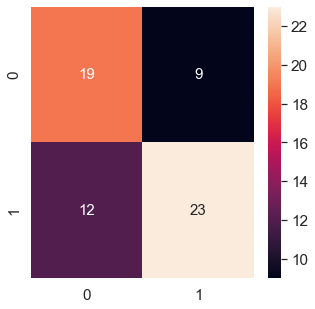

In [327]:
weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 1, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)

model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)
print("XGBoost (Undersampling) Accuracy: ", model.score(x_test_us ,y_test_us))

cm = confusion_matrix(y_test_us, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

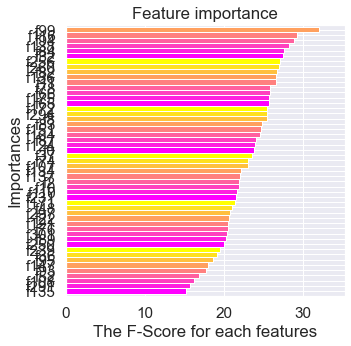

In [328]:
import xgboost as xgb
colors = plt.cm.spring(np.linspace(0, 1, 9))
xgb.plot_importance(model, height = 1, color = colors, grid = True, importance_type = 'cover', show_values = False)

plt.rcParams['figure.figsize'] = (50, 50)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

## OverSampling with SMOTE

In [329]:
# smote
x_resample, y_resample  = SMOTE(random_state=1).fit_resample(x, y.values.ravel())

x_train_os, x_test_os, y_train_os, y_test_os = train_test_split(x, y, test_size = 0.3, random_state = 1)

sc = StandardScaler()
x_train_os = sc.fit_transform(x_train_os)
x_test_os = sc.transform(x_test_os)

# Grid Search
parameters = [{
  'max_depth' : [1, 2, 3, 4, 5, 6],
  'cv' : [2,4,6,8,10],
  'random_state' : [1]}]

# making a grid search model
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', n_jobs = -1)
grid_search = grid_search.fit(x_train_os, y_train_os)

# getting the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)


[23:12:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "cv", "scale_pos_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:12:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Accuracy:  0.6413793103448275
Best Parameter:  {'cv': 2, 'max_depth': 4, 'random_state': 1}


c:\Users\sumin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\sumin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sumin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23:12:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "cv", "scale_pos_weights" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:12:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:>

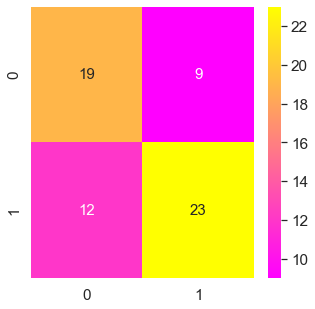

In [330]:
weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 1, scale_pos_weights = weights, n_jobs = 4,random_state=1,cv=2)
model.fit(x_train_os, y_train_os)
y_pred = model.predict(x_test_os)

cm = confusion_matrix(y_test_os, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15}, cmap = 'spring')

## PCA 차원축소

In [331]:
from scipy.stats import zscore
# pca를 위해 데이터 확장
df_new=df.iloc[:,:306].apply(zscore)
df_new.head()

# 결측치 처리
df_new = df_new.replace(np.NaN, 0)

# x, y 지정
x = df_new.iloc[:,:306]
y = df["Pass/Fail"]


### 공분산 행렬 생성
- 간단히 가중치를 주는 행위라고 생각
- PC(Principal Component)주성문을 찾기 위해 공분산 행렬의 고유벡터 값을 찾아야함

In [332]:
cov_matrix = np.cov(x.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00063857 -0.04781282  0.00759455 ...  0.04477373  0.00523674
   0.02150242]
 [-0.04781282  1.00063857 -0.03046719 ... -0.00922529  0.03950455
   0.04449214]
 [ 0.00759455 -0.03046719  1.00063857 ...  0.01574304 -0.00709495
  -0.03045388]
 ...
 [ 0.04477373 -0.00922529  0.01574304 ...  1.00063857  0.16974222
  -0.48505059]
 [ 0.00523674  0.03950455 -0.00709495 ...  0.16974222  1.00063857
   0.39175294]
 [ 0.02150242  0.04449214 -0.03045388 ... -0.48505059  0.39175294
   1.00063857]]


### 공분산의 고유값 및 고유 벡터 선택

In [333]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
# print('Eigen Vectors \n%s', eig_vecs)
# print('\n Eigen Values \n%s', eig_vals)

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# print("Cumulative Variance Explained", cum_var_exp)

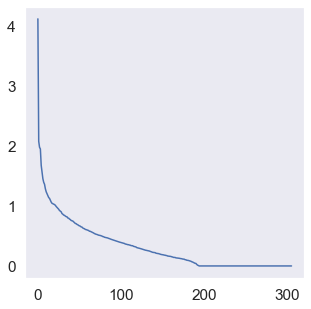

In [334]:
plt.plot(var_exp)

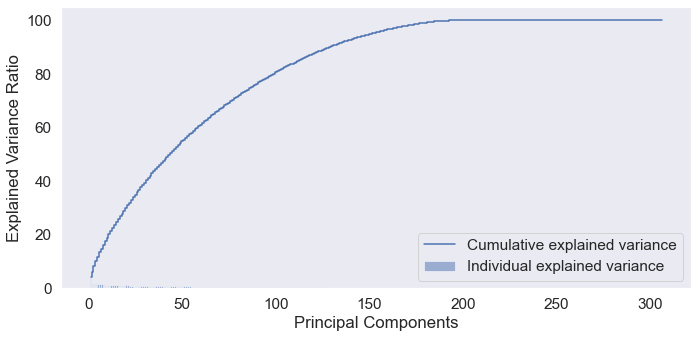

In [335]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

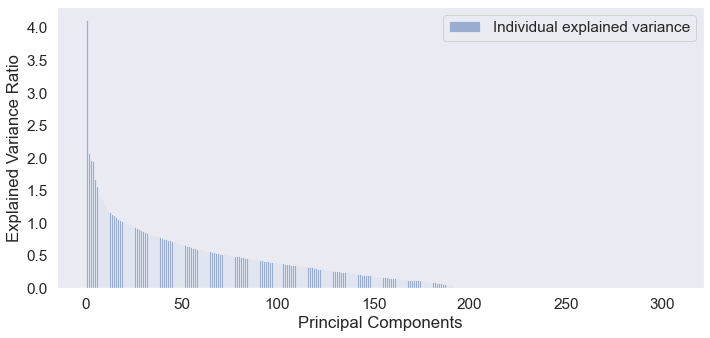

In [336]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [337]:
# 사이킷런으로 PCA 학습
from sklearn.decomposition import PCA

# NOTE - we are generating only 130 PCA dimensions (dimensionality reduction from 306 to 130)
# For 130 components we are getting approximately 90% of the variance
pca = PCA(n_components=130)
data_reduced = pca.fit_transform(x)
data_reduced.transpose()
pca.components_

array([[-0.02536946, -0.00257878,  0.027534  , ..., -0.04853601,
         0.01242534,  0.02569215],
       [-0.00865289,  0.00538526,  0.00681218, ..., -0.05395383,
         0.02265512,  0.06086495],
       [-0.0030313 , -0.03440914, -0.0140036 , ..., -0.04823981,
         0.00838115,  0.04287558],
       ...,
       [ 0.03331975, -0.02453125,  0.03251952, ...,  0.12503197,
        -0.05174669, -0.01091772],
       [-0.01171962,  0.05155499,  0.05561176, ..., -0.04156628,
        -0.04060856,  0.05338969],
       [ 0.03099499, -0.08503555, -0.04373113, ..., -0.06720008,
        -0.10670421,  0.02303532]])

In [338]:
# pca 데이터프레임 생성
df_comp = pd.DataFrame(pca.components_,columns=list(x))
df_comp.head()

,0,1,2,3,4,8,9,10,11,13,...,565,570,571,572,578,582,583,586,587,589
0,-0.025369,-0.002579,0.027534,-0.066608,-0.024699,0.077981,-0.031003,0.017991,-0.011327,4.135903e-25,...,-0.103563,-0.017317,0.095065,-0.020350,-0.006379,-0.012915,0.006665,-0.048536,0.012425,0.025692
1,-0.008653,0.005385,0.006812,0.043185,0.000092,-0.217421,0.002424,0.042955,-0.307618,3.469447e-18,...,0.013689,-0.015341,0.029586,0.013739,0.039335,0.006928,0.006353,-0.053954,0.022655,0.060865
2,-0.003031,-0.034409,-0.014004,-0.003740,-0.003485,-0.062300,-0.011087,-0.037442,-0.033602,1.387779e-17,...,-0.032972,-0.007387,-0.011176,-0.008236,-0.029704,-0.048943,0.013379,-0.048240,0.008381,0.042876
3,-0.011014,0.019492,0.031022,0.008147,0.037434,0.027088,-0.034176,0.030425,0.011598,-1.110223e-16,...,0.042443,-0.031508,-0.018136,0.031905,0.048758,0.010022,0.018018,0.021473,-0.018803,-0.007799
4,-0.001614,-0.024109,-0.050000,-0.037773,-0.030995,0.003801,-0.003773,-0.000670,-0.092518,-1.734723e-18,...,-0.051727,-0.022406,0.033652,0.025755,-0.102888,-0.021626,-0.015482,0.035708,-0.088351,-0.083100


<AxesSubplot:>

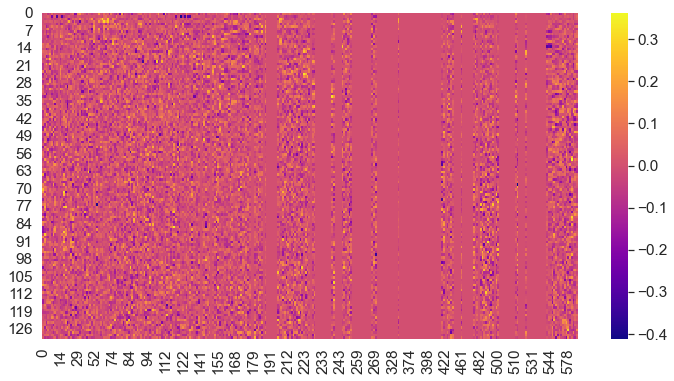

In [339]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [340]:
df_red2 = pd.DataFrame(data_reduced)
df_red2.head()

df_red3 = df_red2.copy()
df_red4 = df_red3
df_red4["Pass/Fail"] = df["Pass/Fail"]
df_red4.head()

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,Pass/Fail
0,3.261863,0.080276,-0.210670,-0.872187,-0.619105,0.753156,-0.013462,-0.573065,-3.189948,1.889996,...,-0.178280,0.522200,-1.643437,0.898258,0.273573,0.829091,-0.681129,0.236899,-0.381471,-1
1,1.812696,0.846175,-0.959908,-0.070785,0.165889,0.658124,-1.083380,0.301781,-2.559515,1.301800,...,0.356542,-0.050406,0.816887,0.488145,0.422207,1.162900,0.558493,0.540405,-0.620394,-1
2,2.215839,0.262121,-1.193324,2.265223,-1.239446,-0.950908,2.024672,0.907042,-1.153373,-1.810903,...,-0.167780,-0.476016,0.700760,-0.655501,0.032732,0.593027,0.407684,0.462729,-0.739053,1
3,3.617138,0.816838,-0.816578,2.151937,-2.613563,-1.409784,1.172995,0.842869,-0.294700,-2.764480,...,2.254492,4.999456,-0.321427,0.874922,-3.258255,-1.526455,-1.989725,-2.176575,0.630724,-1
4,2.765983,0.133805,1.444532,2.270211,-1.497785,-0.623636,-2.929220,-1.897400,2.506556,1.483735,...,0.296653,0.402887,-0.050609,-0.155639,0.246182,-1.383599,-0.047474,-0.492908,0.378612,-1


array([[<AxesSubplot:title={'center':'0'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'1'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'2'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'3'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'4'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'5'}, xlabel='Pass/Fail'>]],
      dtype=object)

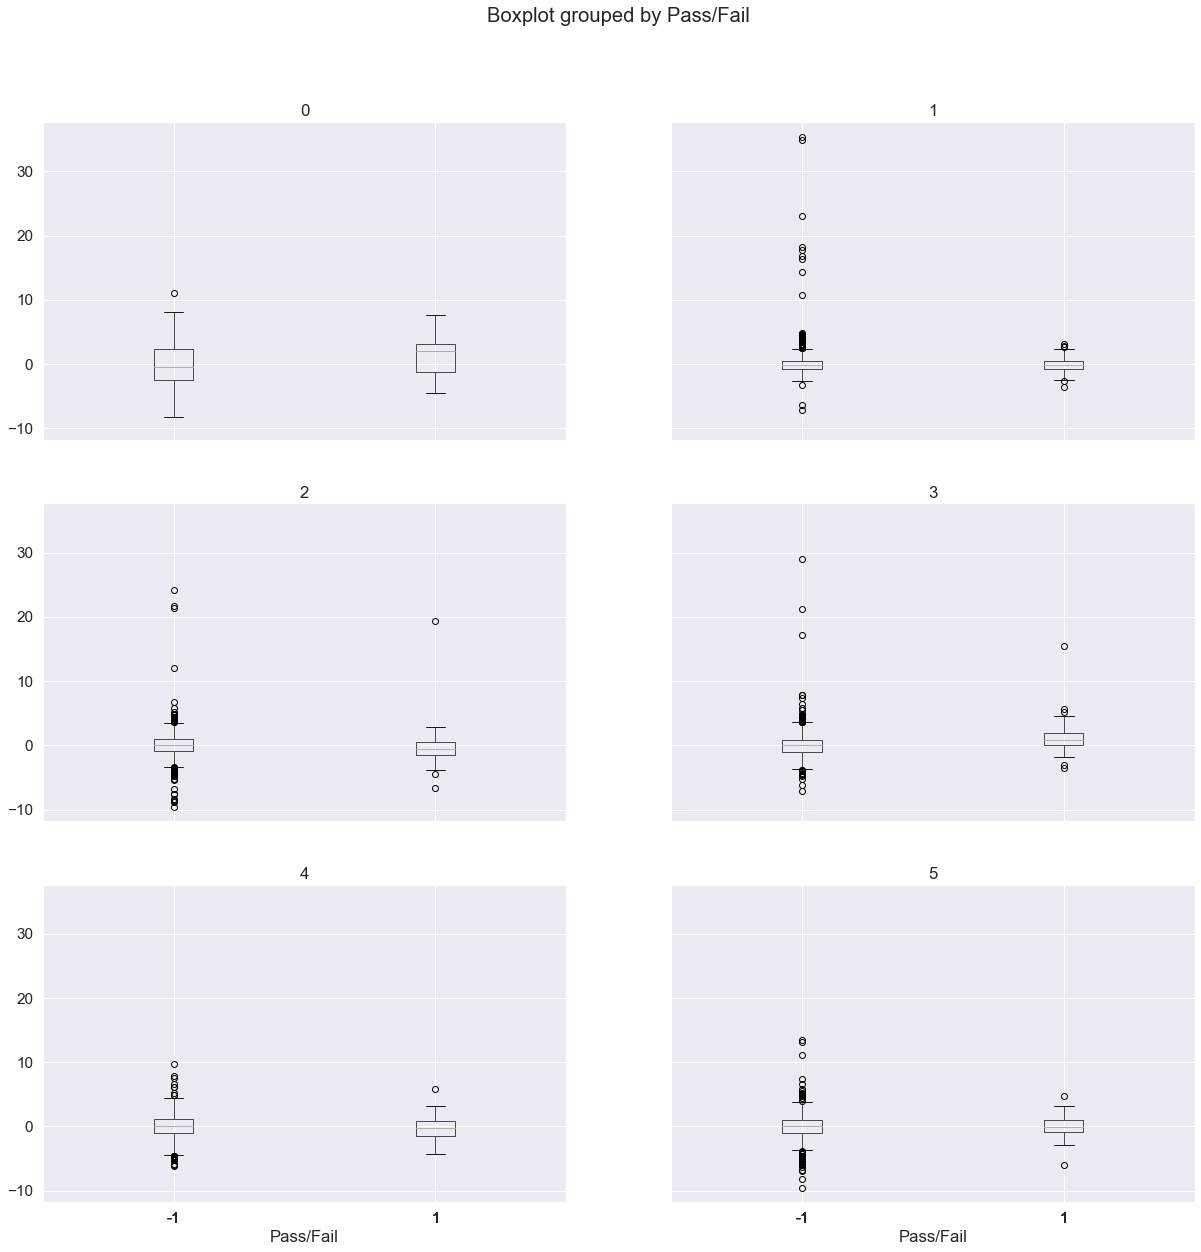

In [341]:
# boxplot으로 데이터 이상치 확인
df_red4.boxplot(column = [
  df_red4.columns[0],
  df_red4.columns[1],
  df_red4.columns[2],
  df_red4.columns[3], 
  df_red4.columns[4],
  df_red4.columns[5],]
, by = 'Pass/Fail', figsize=(20,20))

array([[<AxesSubplot:title={'center':'0'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'1'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'2'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'3'}, xlabel='Pass/Fail'>],
       [<AxesSubplot:title={'center':'4'}, xlabel='Pass/Fail'>,
        <AxesSubplot:title={'center':'5'}, xlabel='Pass/Fail'>]],
      dtype=object)

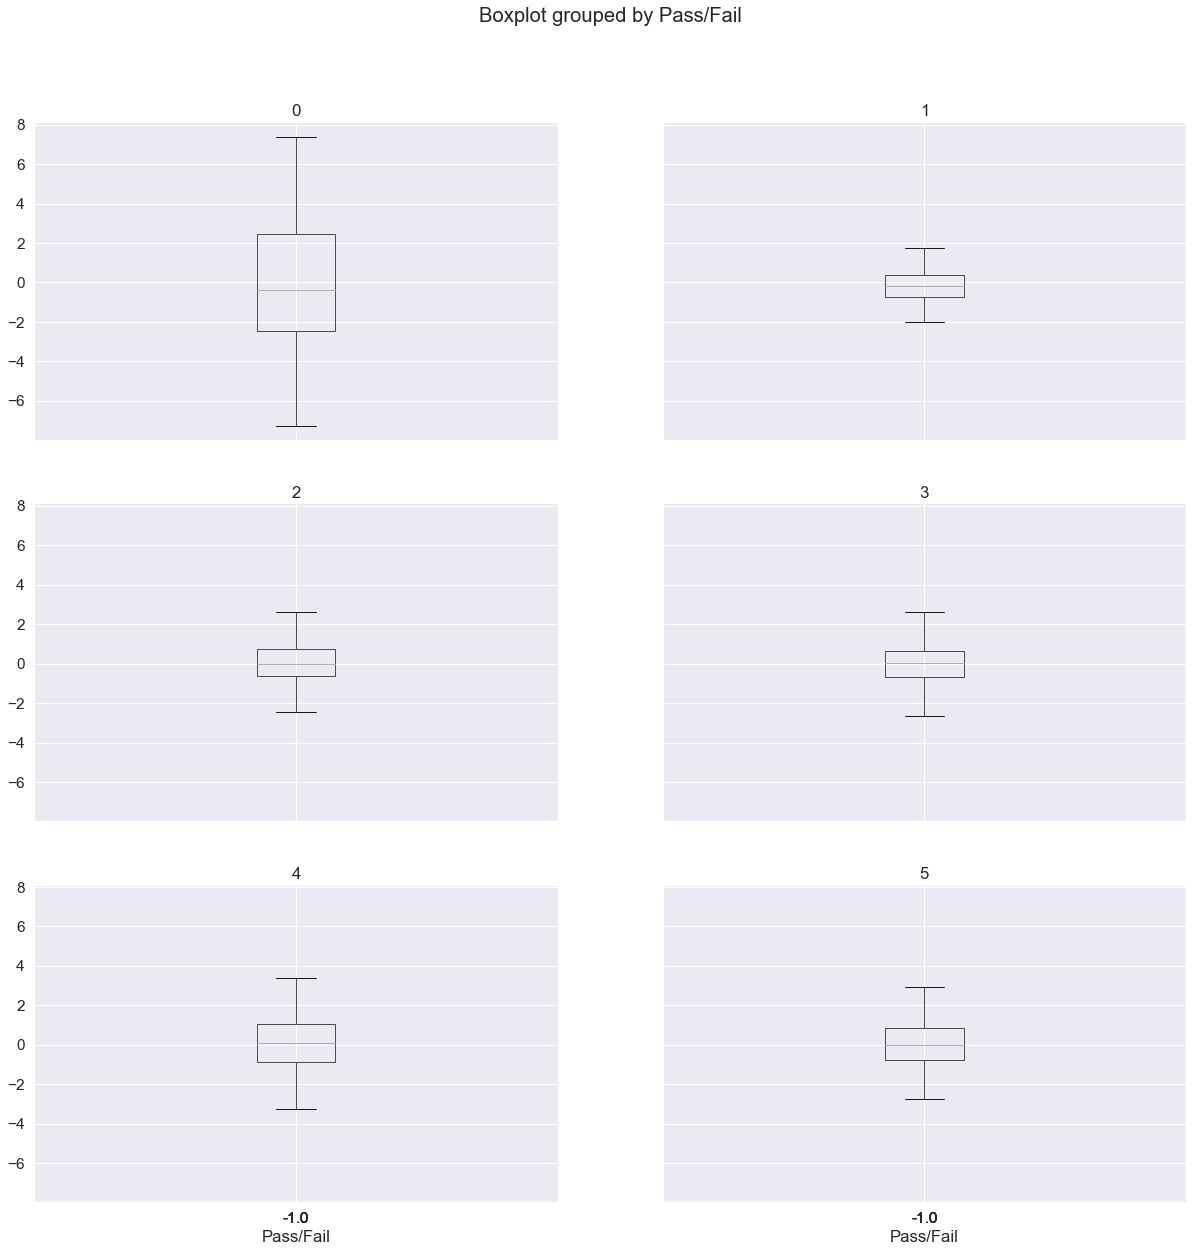

In [342]:
# 이상치 제거후 boxplot 확인
pd_data = df_red4.copy()
from scipy import stats

# 최대쪽에서 이상치 제거
def outlier_removal_max(var):
    var = np.where(var > var.quantile(0.75)+ stats.iqr(var),var.quantile(0.50),var)
    return var

# 최소쪽에서 이상치 제거
def outlier_removal_min(var):
    var = np.where(var < var.quantile(0.25) - stats.iqr(var),var.quantile(0.50),var)
    return var

# 컬럼 반복해서 최대 최소 이상치 제거
for column in pd_data:
    pd_data[column] = outlier_removal_max(pd_data[column])
    pd_data[column] = outlier_removal_min(pd_data[column])
# 박스 플롯 다시 찍기
pd_data.boxplot( column =[df_red4.columns[0],
  df_red4.columns[1],
  df_red4.columns[2],
  df_red4.columns[3], 
  df_red4.columns[4],
  df_red4.columns[5],]
, by = 'Pass/Fail', figsize=(20,20))

c:\Users\sumin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\sumin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\sumin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\

[23:12:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
PCA XGBClassifier Accuracy:  0.5396825396825397


<AxesSubplot:>

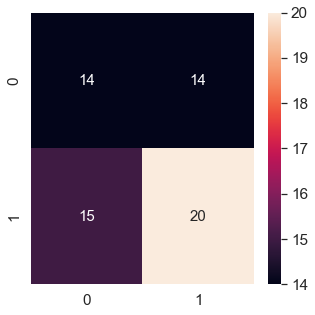

In [343]:
# 언더샘플로 학습
undersample_data = df_red4.iloc[under_sample, :]
# 데이터 나누기
x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail'] 
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x, y, test_size = 0.3, random_state = 1)

model = XGBClassifier(random_state=1)
model.fit(x_train_us, y_train_us)
y_pred = model.predict(x_test_us)
print("PCA XGBClassifier Accuracy: ", model.score(x_test_us,y_test_us))

# confusion_matrix
cm = confusion_matrix(y_test_us, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})